##### Version 0.01 -- Travanj 2017

# Izvor i ponor u uniformnom toku

Ovdje ćemo kreirati rješenje dodavanjem izvora, ponora i uniformne struje fluida. Koristimo *superpoziciju*, što nam omogućava linearna osobina potencijalnog toka definiranog Laplace-ovom jednadžbom: $\nabla^2 \phi =0$.
    
Ovdje ćemo koristiti i funkcije. Tako je lakše.

## Početak kraja

Kao i prije, potrebno je reći koje module/knjižnice želimo koristiti:  **NumPy**, **Matplotlib** i `math` modul.

U **IPython notebook** je dobro *ubaciti* `%matplotlib inline` naredbu koja iscrtava grafove unutar notebook-a.

In [14]:
import numpy
import math
from matplotlib import pyplot
# display figures in the Notebook
%matplotlib inline

Cilj je vizualizacija strujnica našeg potencijalnog toka te moramo kreirati točke u domeni u kojima ćemo izračunati brzine. 

In [15]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Liste `X` i `Y` sadrže $x$ i $y$ koordinate za svaku točku u domeni.

Ovdje se podrazumijeva razumijevanje (da, znam) funkcije [`meshgrid()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html), veličina listi (recimo `X`), itd. Kao i uvijek, NumPy funkcija `shape()` može biti od koristi:

In [16]:
numpy.shape(X)

(200, 200)

Na prvi pogled, to je iznenađenje, zar ne?

## Izvor u uniformnom toku

Već znamo izračunati polje brzina za izvor i ponor, a sada ćemo ih dodati na uniformni tok.

Strujnice uniformnog toka brzine $U_\infty$ i kuta upada $\alpha$ su date sa:

$$\psi_\text{freestream}\left(x,y\right) = U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

Strujnice su ravne, paralelne linije koje zatvaraju kut $\alpha$ s $x$ osi. Ako je tok horizontalan, onda vrijedi $\psi= U_\infty y$. Nakon integracije dobijamo $u=U_\infty$ and $v=0$.
    
Kreirajmo liste koje sadrže $u$ i $v$ brzine  te *stream funkiju* uniformnog horizontalnog strujanja $\left(U_\infty,\alpha=0\right)$, za svaku točku naše domene. Upotrijebit ćemo NumPy funkcije [`ones()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), koja kreira novu listu s jedinicama, i `zeros()`, koja kreira listu punu nula.

In [17]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

Ovdje nema potrebe za `for` petljom: `psi_freestream` je izračunat u jednoj liniji - ovo je osobina `Numpy` knjižnice.

---

__Podsjetnik__

*Stream funkcija* izvora na $\left(x_\text{source},y_\text{source}\right)$ iznosi:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right).$$

Komponente brzine:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

*Stream funkcija* i polje brzina izvora i ponora su isti, osim što je intenzitet izvora pozitivan, a ponora negativan. 

---

Sada se može napisati funkcija za izvor i ponor: pozitivna $\sigma$ će davati polje brzina i strujnice za izvor, a negativna $\sigma$ za ponor.

Definirajmo funkciju `get_velocity()` za računanje komponenti brzina $(u,v)$ na mreži (`X`,`Y`), za zadani intenzitet dat sa `strength` i pozicijom (`xs`,`ys`). Ključna riječ je `def`, nakon čega slijedi ime funkcije, parametri i završavamo sa dvotočkom `:`.

In [5]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

Primijetiti poruku nakon deklaracije funkcije. Autor funkcije ovdje pomaže korisnicima da dobiju što je moguće više informacija o funkciji, čime je onda korištenje funkcije i njeno razumijevanje uvelike olakšano. To se još zove i "docstring". Svaka poruka između `"""Trostruki navodnici"""` će odmah nakon deklaracije funkcije biti prikazana kada korisnik pozove `help()`. Npr.:

In [18]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.



Outpu funkcije su dvije liste, `u` i `v`. Izračunate su unutar tijela funkcije, što je definirano *uvučenim* linijama nakon dvotočke. Zadnja linija vraća (šalje) liste iz funkcije pomoću`return` naredbe.

Analogno, definiramo funkciju koja računa *stream funkciju* za izvor/ponor, a nazvali smo je `get_stream_function()`.

In [19]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

Sada možemo dodati izračunata polja brzina i strujnice izvora s gornje dvije funkcije. Time je dodavanje bilo kojeg sljedećeg izvora/ponora olakšano.

Pozovimo te funkcije:

In [20]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

Upotrijebimo superpoziciju. Strujnice su kombinacija izvora i uniformnog toka:

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

Kako je diferencijacija linearna, polje brzina novim strujanjem je jednostavno suma brzine uniformnog toka i izvora:

$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

Točke stagnacije (the stagnation points) su točke gdje je brzina jednaka nuli. Ako želimo naći njihove pozicije, moramo riješiti sljedeće jednadžbe:

$$u = 0 , \quad v = 0$$

dalje slijedi:

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty}$$

$$y_\text{stagnation} = y_\text{source}$$

Strujnica koja sadrži stagnacijsku točku se naziva *dividing streamline*. Ona odvaja fluid koji dolazi iz uniformnog toka i fluid koji dolazi iz izvora. Nacrtat ćemo je kao crvenu krivulju upotrijebivši [`contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) funkciju. 

Specificira se boja, širina linije itd. Za ostale opcije i primjere, pogledajte [contour-plot demos](http://matplotlib.org/examples/pylab_examples/contour_demo.html).

Nacrtat ćemo crveni kružić na mjestu stagnacijske točke sa [`scatter()`](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter) funkcijom.

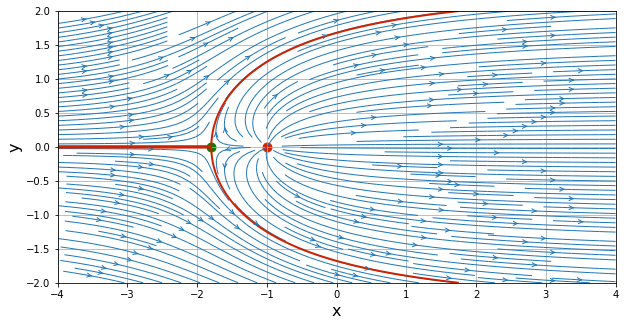

In [21]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');

Ovakvo strujno polje izgleda kao strujanje koje je naišlo na prepreku zakrivljenog oblika.

Ako zanemarimo strujanje *unutar* *dividing streamline*, možemo to područje smatrati krutim tijelom, a naziva se još i *Rankine half body*.

##### Zadačić

Koja je maksimalna *širina* Rankinovog tijela?

**Mala pomoć**: Upotrijebiti očuvanje mase i zamisliti da je strujanje u $x$ smjeru jaaako veliko.

## Source-sink pair u uniformnom toku

Dodajmo još i ponor u strujanje. Dobro će nam koristiti već definirane funkcije`getVelocity()` i `getStreamfunction()`.

In [22]:
strength_sink = -5.0        # strength of the sink
x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

Superpozicija uniformnog toka, izvora i ponora nije ništa drugo već jednostavno zbrajanje, a NumPy to čini još i intuitivnim.

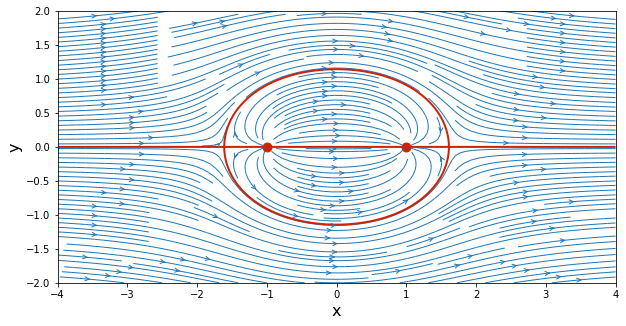

In [23]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

Strujanje postaje sve zanimljivije (ok, kompleksnije). Eliptična zatvorena strujnica se može smatrati kao povrišine tijela oko kojeg struji fluid. I ovo ima ime: *Rankine oval*.

Sada se može eksperimentirati s intenzitetima izvora i ponora i proučiti kako se mijenja strujanje fluida.

##### Zadačić

Koja je duljina i širina Rankinovog ovala?

### Bernoullijeva jednadžba i pressure coefficient

Korisna mjera strujanja fluida oko tijela je *pressure coefficient*, ili $C_p$. Evaluacija je jednostavna: Primjenjujemo *Bernoullijevu jednadžbu* za inkompresibilno strujanje:

$$p_\infty + \frac{1}{2}\rho V_\infty^2 = p + \frac{1}{2}\rho V^2$$

__Iznimno bitno__: Jednadžba vrijedi *duž* strujnice.

Pressure coefficient se definira kao:

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho V_\infty^2}$$

odnosno,

$$C_p = 1 - \left(\frac{V}{V_\infty}\right)^2$$

Za inkompresibilno strujanje $C_p=1$ za stagnacijsku točku.

Sada možemo nacrtati pressure coefficient u cijeloj domeni. Za razmisliti: Gdje je maksimalni, a gdje minimalni tlak? Zašto?

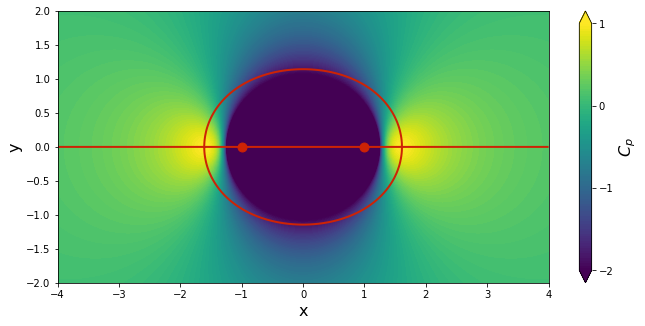

In [24]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

---

---

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()